In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('new_car_data_set.csv')

In [3]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,enginesize,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500


**TASK1**

**Convert mpg to L/100km by mathematical operation (235 divided by mpg)**

In [4]:
 df['city-L/100km'] = 235/df["city-mpg"]

In [5]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495,11.190476
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,11.190476


In [6]:
df['highway-L/100km'] = 235/df["highway-mpg"]

In [7]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495,11.190476,8.703704
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500,11.190476,8.703704


**TASK2**

**Normalized the Length, hight and width column**

In [8]:
 df['length'] = df['length']/df['length'].max()

In [9]:
 df['height'] = df['height']/df['height'].max()

In [10]:
 df['width'] = df['width']/df['width'].max()

**TASK3**

**Creating bins and plot a histrogram for it**

In [11]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)

In [12]:
group_names = ["Low", "Medium", "High"]

In [13]:
df["horsepower-binned"] = pd.cut(df["horsepower"], bins, labels=group_names, include_lowest=True)

In [14]:
df["horsepower"].head(10)

0    111.0
1    111.0
2    154.0
3    102.0
4    115.0
5    110.0
6    110.0
7    110.0
8    140.0
9    160.0
Name: horsepower, dtype: float64

In [15]:
df["horsepower-binned"].head(10)

0       Low
1       Low
2    Medium
3       Low
4       Low
5       Low
6       Low
7       Low
8    Medium
9    Medium
Name: horsepower-binned, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

Text(0.5, 1.0, 'horsepower bins')

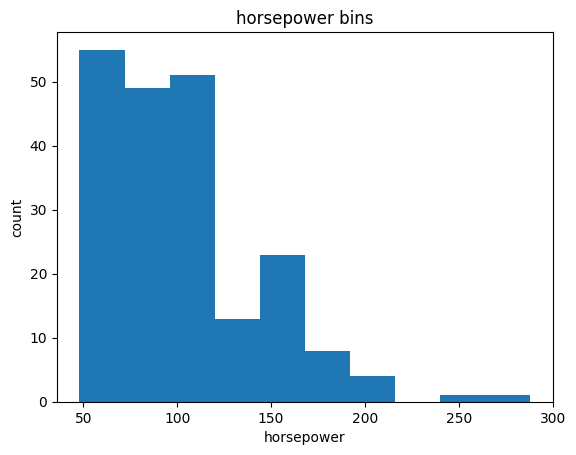

In [16]:
plt.hist(df["horsepower"])
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

**TASK4**

**Check the number of vehicles in each bin and plot the distribution of each bin**

<BarContainer object of 3 artists>

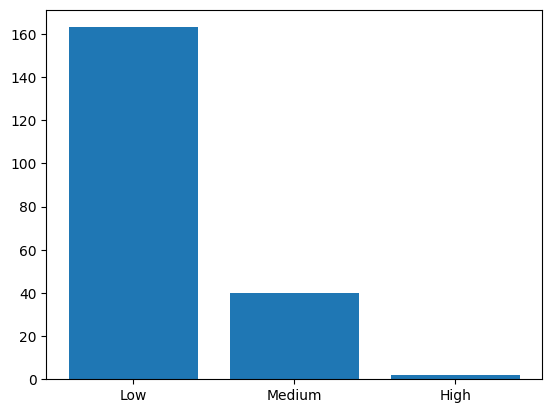

In [17]:
plt.bar(group_names, df["horsepower-binned"].value_counts())


**TASK5**

**Normally, a histogram is used to visualize the distribution of bins we created above**

(array([163.,  40.,   2.]),
 array([ 48., 128., 208., 288.]),
 <BarContainer object of 3 artists>)

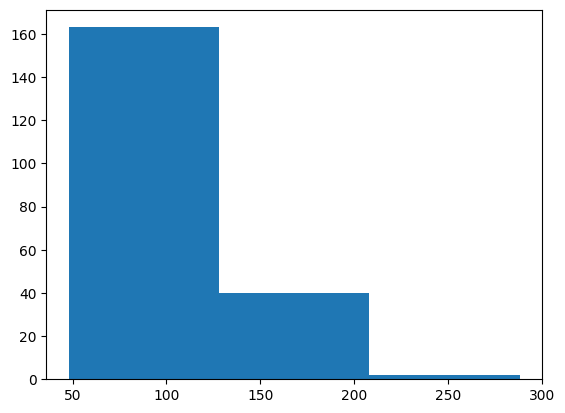

In [18]:
plt.hist(df["horsepower"], bins = 3)

**TASK6**

**create an indicator variable for the column "aspiration" and 
merge the new dataframe to the original dataframe, then drop the column 'aspiration'.**

In [19]:
 dummy_variable_1 = pd.get_dummies(df["aspiration"])

In [20]:
 dummy_variable_1.head(2)

,std,turbo
0,True,False
1,True,False


In [21]:
 dummy_variable_1.rename(columns={'std':'aspiration-std-true', 'turbo':'aspiration-turbo-false'}, 
inplace=True)

In [22]:
 dummy_variable_1.head(2)

,aspiration-std-true,aspiration-turbo-false
0,True,False
1,True,False


In [23]:
 df = pd.concat([df, dummy_variable_1], axis=1)

In [24]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,aspiration-std-true,aspiration-turbo-false
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111.0,5000.0,21,27,13495,11.190476,8.703704,Low,True,False
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111.0,5000.0,21,27,16500,11.190476,8.703704,Low,True,False


In [25]:
 df.drop("aspiration", axis = 1, inplace=True)


In [26]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,aspiration-std-true,aspiration-turbo-false
0,3,122.0,alfa-romero,gas,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,13495,11.190476,8.703704,Low,True,False
1,3,122.0,alfa-romero,gas,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,16500,11.190476,8.703704,Low,True,False
